# Stability of Runge-Kutta Methods

#### Learning outcomes

On successful completion of this page readers will be able to:

- Understand the concept of [local](#local_truncation_error) and [global](#global_truncation_error) truncation errors and what it means for a method to be considered [stable](#stability_definition).
- Determine the [stability function](#Stability-functions) of [explicit](#Stability-function-of-an-explicit-Runge-Kutta-method) and [implicit](#Stability-function-of-an-implicit-Runge-Kutta-method) Runge-Kutta method.
- Plot the region of [absolute stability](#Absolute-stability).
- Determine whether an implicit Runge-Kutta method is [A-stable](#A-stability) or not.

The derivation of a numerical method to solve an ODE involves omitting the higher-order terms from the Taylor series known as **truncating** the [Taylor series](https://en.wikipedia.org/wiki/Taylor_series). In doing this we introduce an errors which at each step of the method and it is important to be able to analyse the extent to which these errors affect the numerical solutions. In the majority of cases the exact solution of an ODE is unknown (if it was known we would not need to use a numerical method to solve it) so we cannot determine the values of the errors but we can examine their behaviour through each step of the method.

To do this it is necessary to introduce terminology used to describe the [truncation errors](https://en.wikipedia.org/wiki/Truncation_error_(numerical_integration)).


```{admonition} **Definition**: Local trunction error
Let $y_n$ be a numerical approximation of the exact solution $y(t_n)$ for some step $n$ of a method then the **local truncation error** is 

$$ \tau_n = |y_n - y(t_n)|.$$
```
    

```{admonition} **Definition**: Global trunction error
**Definition:** The **global truncation error** is the accumulation of the local truncation errors up to the current step

$$E_n = \sum_{i=0}^n \tau_i.$$
```

If $|\tau_{i+1} - \tau_{i}|>1$ (i.e., the local truncation errors grow from one step to the next) then $E_n \to \infty$ as $n$ gets large and the method is said to be **unstable** and unusable. So for a method to be considered **stable** we need the the growth in the local truncation errors to remain bounded which leads to the definition of numerical stability.

```{admonition} **Definition**: Stability 
If $\tau_n$ is the local truncation error of a numerical method for solving a differential equation then the method is considered **stable** if 

$$|\tau_{n+1} - \tau_{n}|\leq 1,$$ 

for all steps of the method.
```

Since the Taylor series truncation error  is some function of the step length , as  increases then so does the truncation error and the more likely a method is to be unstable. 

#### Example 1
Consider the [Euler method](https://en.wikipedia.org/wiki/Euler_method) when applied to solve the ODE $y' = -2.3y$ over the domain $t \in [0, 5]$ with an initial condition $y(0) = 1$. This ODE has the exact solution $y=e^{-2.3t}$. The code below compares the Euler method solutions using two steps lengths of $h=0.7$ and $h=1$ to the exact solution.

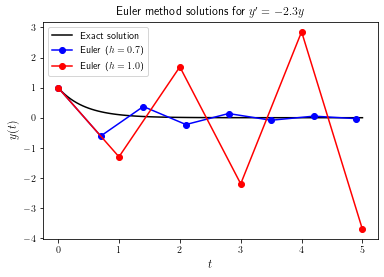

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

def euler(tspan, y0, h):
    '''
    Calculates the solution to an IVP using the Euler method
    '''
    # Initialise solution arrays
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros(nsteps + 1)
    t[0] = tspan[0]
    y[0] = y0
    
    # Solver loop
    for n in range(nsteps):
        y[n+1] = y[n] + h * f(t[n], y[n])
        t[n+1] = t[n] + h
    
    return t, y

def f(t, y):
    return -2.3 * y


def exact_sol(t):
    return np.exp(-2.3 * t)


# Define IVP parameters
tspan = [ 0, 5 ]
y0 = 1
h1, h2 = 0.7, 1.0

# Solve IVP using the Euler method 
t1, y1 = euler(tspan, y0, h1) # h = 0.7
t2, y2 = euler(tspan, y0, h2) # h = 1.0

# Plot numerical and exact solutions
fig, ax = plt.subplots()

t = np.linspace(tspan[0], tspan[1], 100)
ax.plot(t, exact_sol(t), 'k-', label='Exact solution')
ax.plot(t1, y1, 'bo-', label='Euler ($h={:0.1f}$)'.format(h1))
ax.plot(t2, y2, 'ro-', label='Euler ($h={:0.1f}$)'.format(h2))

ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.set_title("Euler method solutions for $y'=-2.3y$", fontsize=12)
ax.legend()

plt.show()

Here we can see that the solution using $h=0.7$ remains stable whereas the solution using $h=1.0$ is diverging and unstable.

## Stability functions

To examine the behaviour of the local truncation errors as we step through a method we use the test ODE $y' = \lambda y$. As the values of $y_{n+1}$ are updated using the values of $y_n$ so are the values of $\tau_{n+1}$ using $\tau_n$ by the same method. This allows us to define a **stability function** for a method.

```{admonition} **Definition:** Stability function
The **stability function** of a method, $R(z)$ is the rate of growth over a single step of the method when applied to calculate the solution of an ODE of the form $y'=\lambda y$ where $z = h\lambda$ and $h$ is the step size, i.e.,

$$y_{n+1} = R(z)y_n.$$
```

#### Example 2
Determine the stability function for the Euler method.

If the Euler method is used to solve and ODE of the form $y'=f(t, y)$ then the solution will be updated over one step using

$$y_{n+1} = y_n + hf(t_n, y_n),$$

then the local truncation errors will also update in the same step by

$$\tau_{n+1} = \tau_n + hf(t_n, \tau_n).$$

Applying the Euler method to the test ODE we have

$$y_{n+1} = y_n + h\lambda y_n.$$

Let $z = h\lambda$ then

$$y_{n+1} = y_n + zy_n = (1 + z) y_n.$$

So the stability function of the Euler method is $R(z) = 1 + z$.

### Absolute stability
We have seen that a necessary condition for stability of a method is that the local truncation errors must not grow from one step to the next. A method satisfying this basic condition is considered to be **absolutely stable**. Since the stability function $R(z)$ is expressed using $z=h\lambda$ then a method may be stable for some value of $z$ and unstable for others. This provides the definition for absolute stability. 

```{admonition} **Definition:** Absolute stability
A method is considered to be **absolutely stable** if $|R(z)\leq 1|$ for $z\in \mathbb{C}$.
```

Of course we require our methods to be stable so it is useful to know for what values of $z$ we have a stable method. This gives the definition of the **region of absolute stability**.

```{admonition} **Definition:** Region of absolute stability
The **region of absolute stability** is the set of all $z\in \mathbb{C}$ for which a method is absolutely stable.

$$\text{region of absolute stability} = \{ z : z \in \mathbb{C}, |R(z)| \leq 1 \}.$$
```

#### Example 3
The stability function for the Euler method is $R(z) = 1 + z$. The code below generates a set of points in the complex plane $z = x + yi$ (where $i=\sqrt{-1}$) and plots the contour where $|R(z)|=1$ which represents the boundary of the stability region of the Euler method. 

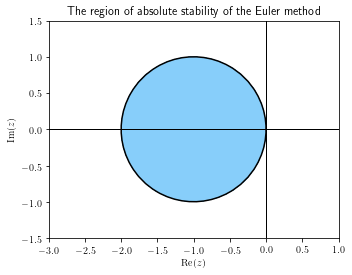

In [2]:
# Generate z values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
[X, Y] = np.meshgrid(x, y)
Z = X + Y * 1j

# Define the stability function for the Euler method
R = 1 + Z
 
# Plot the region of absolute stability
fig, ax = plt.subplots()

ax.contourf(X, Y, abs(R), levels=[0, 1], colors='lightskyblue')
ax.contour(X, Y, abs(R), levels=[1], colors='k')
ax.plot([-10, 10], [0, 0], 'k', linewidth=1)
ax.plot([0, 0], [-10, 10], 'k', linewidth=1)

ax.set_title('The region of absolute stability of the Euler method')
ax.set_xlabel('$\mathrm{Re}(z)$')
ax.set_ylabel('$\mathrm{Im}(z)$')
ax.set_xlim(-3, 1)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect(1)

plt.show()

The Euler method for solving $y'=\lambda y$ will be stable for point $z$ that lies within the shaded region.

### Interval of absolute stability
The choice of step length used in a method will depend on accuracy requirements, computational resources available and of course stability. It is often necessary to use as large a value of the step length as possible permitted by the stability requirements to minimise the computational effort required to solve an ODE. The range values of the step length that can be chosen is governed by the stability region and provides use with the following definition.

```{admonition} **Definition:** Interval of absolute stability
The range of real values that the step length $h$ of a method can take that ensures a method remains absolutely stable is known as the **interval of absolute stability**
```

The region of absolute stability for the Euler method plotted above shows that the interval of absolute stability is

$$z \in [-2, 0],$$

i.e., the real part of the region of absolute stability.

Since $z=h\lambda$ then
\begin{align*}
    h \in \left[ -\frac{2}{\lambda}, 0\right],
\end{align*}
so we have the condition 

$$h \leq -\dfrac{2}{\lambda}.$$

#### Example 4
The step length for the Euler method when used to solve the ODE $y'=-2.3y$ must satisfy

$$h \leq \frac{2}{2.3} \approx 0.8696.$$

This is why in the first example the solution using $h=0.7$ was stable since $0.7 < 0.8696$ and the solution using $h=1.0$ was unstable since $1 > 0.8696$.

---
### Stability function of a Runge-Kutta Method

The general form of a Runge-Kutta method is

$$
\begin{aligned}
    y_{n+1} &= y_n + h\sum_{i=1}^s b_i k_i, \\
    k_i &= f(t_n + c_ih, y_n + h\sum_{j=1}^s a_{ij}k_j).
\end{aligned}
$$

Let $Y_i = y_n + h\displaystyle\sum_{j=1}^s a_{ij}k_j$ and applying the method to the test ODE $y'=\lambda y$ the method becomes

```{math}
:label: y_{n+1}
y_{n+1} = y_n + h\lambda \sum_{i=1}^s b_i Y_i,
```

and the stage values are

```{math} 
:label: Y_i
Y_i = y_n + h\lambda \displaystyle\sum_{j=1}^s a_{ij} Y_j.
```

Let $z=h\lambda$ and expanding out the summations in the stage values gives

$$
\begin{aligned}
    Y_1 &= y_n + z (a_{11}Y_1 + a_{12}Y_2 + \cdots + a_{1s}Y_s), \\
    Y_2 &= y_n + z (a_{21}Y_1 + a_{22}Y_2 + \cdots + a_{2s}Y_s), \\
    & \vdots \\
    Y_s &= y_n + z (a_{s1}Y_1 + a_{s2}Y_2 + \cdots + a_{ss}Y_s).
\end{aligned}
$$

Let $Y = (Y_1, Y_2, \ldots, Y_s)^T$ and $\mathbf{e} = (1, 1, \ldots, 1)^T$ then we can write the stage values in vector form as

```{math}
:label: Y
    Y = \mathbf{e} y_n + z \,A \cdot Y.
```

Substituting $\displaystyle\sum_{i=1}^s b_iY_i = \mathbf{b}^T \cdot Y$ into equation {eq}`y_{n+1}` gives the vector form of a Runge-Kutta method to solve the test ODE

```{math}
:label: y_{n+1}_vector
y_{n+1} = y_n + z\, \mathbf{b}^T \cdot Y.
```

### Stability function of an explicit Runge-Kutta method

Rerranging equation {eq}`Y` we have

$$Y = (I - zA)^{-1} \cdot \mathbf{e} y_n,$$

and substituting into equation {eq}`y_{n+1}_vector` gives

$$
\begin{aligned}
    y_{n+1} &= y_n + z\mathbf{b}^T \cdot (I - zA)^{-1} \cdot \mathbf{e} y_n\\
    &= (1 + z\mathbf{b}^T \cdot (I - zA)^{-1} \cdot \mathbf{e})y_n,
\end{aligned}
$$

so the stability function is

$$R(z) = 1 + z\mathbf{b}^T \cdot (I - zA)^{-1} \cdot \mathbf{e}.$$ 

Using the geometric series of matrices 

$$(I - zA)^{-1} = \sum_{k=0}^\infty (zA)^k,$$

the stabilty function can be written as the infinite series

```{math}
:label: R(z)
R(z) = 1 + \sum_{k=0}^s \mathbf{b}^T \cdot A^k \cdot \mathbf{e} \, z^k.
```

Since the solution to the test ODE is $y=e^{\lambda t}$, over one step of an Explicit Runge-Kutta (ERK) method we would expect the local truncation errors to change at a rate of $e^z$, 

```{math}
:label: e^z
e^z = \sum_{k=0}^\infty \frac{1}{k!}z^k = 1 + z + \frac{1}{2}z^2 + \frac{1}{6}z^3 + \frac{1}{24}z^4 + \cdots
```

Comparing the coefficients of $z^k$ in $R(z)$ and $e^z$ we have

$$\frac{1}{k!} = \mathbf{b}^T\cdot A^{k-1} \cdot \mathbf{e},$$

which must be satisfied up to the $k$th term for an order $k$ ERK method to be stable.

#### Example 5
Determine the stability function for the following Runge-Kutta method and hences find its order.

$$\begin{array}{c|cccc}
    0 & \cr
    \frac{1}{2} & \frac{1}{2} \cr
    \frac{3}{4} & 0 & \frac{3}{4} \cr
    1 & \frac{2}{9} & \frac{1}{3} & \frac{4}{9} \cr \hline
    & \frac{7}{24} & \frac{1}{4} & \frac{1}{3} & \frac{1}{8}
    \end{array}$$
    
The code below calculates the coefficients and outputs the stability function $R(z)$ for this ERK method.

In [3]:
from sympy import *

# Define ERK method
A = Matrix([[0, 0, 0, 0],
            [Rational('1/2'), 0, 0, 0],
            [0, Rational('3/4'), 0, 0],
            [Rational('2/9'), Rational('1/3'), Rational('4/9'), 0]])
b = Matrix([Rational('7/24'), Rational('1/4'), Rational('1/3'), Rational('1/8')])
e = Matrix([[ 1, 1, 1, 1 ]]).T

# Determine stability function
print("R(z) = 1", end="")
for k in range(len(b)):
    coeff = b.T * (A**k) * e
    print(" + {} z**{}".format(coeff[0], k+1), end="")

R(z) = 1 + 1 z**1 + 1/2 z**2 + 3/16 z**3 + 1/48 z**4

So the stability function is 

$$R(z) = 1 + z + \frac{1}{2}z^2 + \frac{3}{16}z^3 + \frac{1}{48}z^4,$$

which agrees to the series expansion of $e^z$ up to and including the $z^2$ term. Therefore this ERK method is of order 2.

#### Example 6

The code below calculates the stability functions of order 1, 2, 3 and 4 ERK methods and plots their regions of absolute stability.

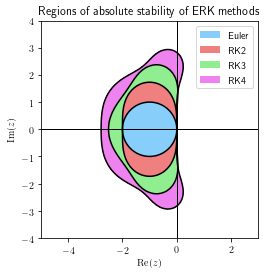

In [4]:
# Generate z values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
[X, Y] = np.meshgrid(x, y)
Z = X + Y * 1j

# Define ERK stability functions
R = np.stack((1 + Z, 1 + Z, 1 + Z, 1 + Z), axis=2)
for k in range(1, 4):
    R[:,:,k] = R[:,:,k-1] + Z**(k+1) / np.math.factorial(k+1)
R = np.abs(R)

# Plot regions of absolute stability
fig, ax = plt.subplots()
colours = ['lightskyblue', 'lightcoral', 'lightgreen', 'violet']

for i in range(3, -1, -1):
    ax.contourf(X, Y, R[:,:,i], levels=[0,1], colors=colours[i])
    ax.contour(X, Y, R[:,:,i], levels=[0,1], colors='k')
    
ax.plot([-10, 10], [0, 0], 'k', linewidth=1)
ax.plot([0, 0], [-10, 10], 'k', linewidth=1)

ax.set_title('Regions of absolute stability of ERK methods')
ax.set_xlabel('$\mathrm{Re}(z)$')
ax.set_ylabel('$\mathrm{Im}(z)$')
ax.set_xlim(-5, 3)
ax.set_ylim(-4, 4)
ax.set_aspect(1)

labels = [plt.Rectangle((0,0),1,2,fc=colours[i]) for i in range(4)]
ax.legend(labels, ['Euler', 'RK2', 'RK3', 'RK4'])

plt.show()

### Stability functions of implicit methods

The simplest implicit method for solving ODEs is the [Backwards Euler](https://en.wikipedia.org/wiki/Backward_Euler_method) method (also known as the implicit Euler method) which is

$$y_{n+1} = y_n + hf(t_n + h, y_{n+1}).$$

Applying this to solve the test ODE $y'=\lambda y$ and rearranging gives

$$
\begin{aligned}
    y_{n+1} &= y_n + h\lambda y_{n+1} \\
    (1 - h\lambda)y_{n+1} &= y_n \\
    y_{n+1} &= \frac{1}{1-h\lambda} y_n,
\end{aligned}
$$

therefore the stability function for the backwards Euler method is $R(z)=\dfrac{1}{1-z}$. Stability functions for implicit methods take the form of a rational fraction

$$R(z) = \dfrac{P(z)}{Q(z)}.$$

#### Example 7
The code below plots the region of absolute stability of the backwards Euler method.

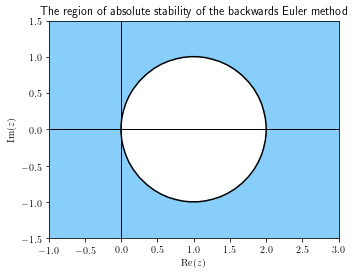

In [5]:
# Generate z values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
[X, Y] = np.meshgrid(x, y)
Z = X + Y * 1j

# Define stability function for the backwards Euler method
R = abs(1 / (1 - Z))

# Plot the region of absolute stability
fig, ax = plt.subplots()

ax.contourf(X, Y, R, levels=[0, 1], colors='lightskyblue')
ax.contour(X, Y, R, levels=[1], colors='k')
ax.plot([-10, 10], [0, 0], 'k', linewidth=1)
ax.plot([0, 0], [-10, 10], 'k', linewidth=1)

ax.set_title('The region of absolute stability of the backwards Euler method')
ax.set_xlabel('$\mathrm{Re}(z)$')
ax.set_ylabel('$\mathrm{Im}(z)$')
ax.set_xlim(-1, 3)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect(1)

plt.show()

Here the region of absolute stability includes all of the complex plane with the exception of the unshaded region shown here.

### Stability functions for an implicit Runge-Kutta method

To determine the stability function for an Implicit Runge-Kutta (IRK) method we use equations {eq}`y_{n+1}_vector` and {eq}`Y`

$$
\begin{aligned}
    y_{n+1} &= y_n + z \mathbf{b}^T \cdot Y, \\
    Y &= \mathbf{e} y_n + z A \cdot Y.
\end{aligned}
$$

Transposing these equations so that the terms not involving $y_n$ to the left-hand side gives

$$
\begin{aligned}
    y_{n+1} - z \mathbf{b}^T \cdot Y &= y_n, \\
    (I - zA) \cdot Y & = \mathbf{e}y_n.
\end{aligned}
$$

which can be written as the matrix equation

$$
\pmatrix{ 1 & -zb_1 & -zb_2 & \cdots & -zb_s \\
    0 & 1 - za_{11} & -za_{12} & \cdots & -za_{1s} \\
    0 & -za_{21} & 1 - za_{22} & \cdots & -za_{2s} \\
    0 & \vdots & \vdots & \ddots & \vdots  \\
    0 & -za_{s1} & -za_{s2} & \cdots & 1-za_{ss}
    }
\pmatrix{ y_{n+1} \\ Y_1 \\ Y_2 \\ \vdots \\ Y_s } = 
\pmatrix{ y_n \\ y_n \\ \vdots \\ y_n \\ y_n}.
$$

Using [Cramer's rule](https://en.wikipedia.org/wiki/Cramer%27s_rule) to solve this system for $y_{n+1}$ we have

$$
\begin{aligned}
y_{n+1} &= \frac{\det
\pmatrix{ y_n & -zb_1 & -zb_2 & \cdots & -zb_s \\
    y_n & 1 - za_{11} & -za_{12} & \cdots & -za_{1s} \\
    y_n & -za_{21} & 1 - za_{22} & \cdots & -za_{2s} \\
    y_n & \vdots & \vdots & \ddots & \vdots  \\
    y_m & -za_{s1} & -za_{s2} & \cdots & 1-za_{ss}
    }}{\det(I - zA)}.
\end{aligned}
$$

Performing a row operation of subtracting the first row of matrix in the numerator from the other rows gives

$$
\begin{aligned}
y_{n+1} &= \frac{\det
\pmatrix{ y_n & -zb_1 & -zb_2 & \cdots & -zb_s \\
    0 & 1 - za_{11} + zb_1 & -za_{12} + zb_2 & \cdots & -za_{1s} + zb_s \\
    0 & -za_{21} + zb_1 & 1 - za_{22} + zb_2 & \cdots & -za_{2s} + zb_s \\
    0 & \vdots & \vdots & \ddots & \vdots  \\
    0 & -za_{s1} + zb_1 & -za_{s2} + zb_2 & \cdots & 1-za_{ss} + zb_s
    }}{\det(I - zA)} \\
    &= \frac{y_n\det(I - z\,(A - \mathbf{e}\cdot \mathbf{b}^T))}{\det(I - z\,A)},
\end{aligned}
$$

where $\mathbf{e}\cdot \mathbf{b}^T$ is a diagonal matrix with the elements of $\mathbf{b}$ on the main diagonal. Therefore the stability function of an Implicit Runge-Kutta (IRK) method can be written as

```{math}
:label: irk_R(z)
R(z) = \frac{\det(I - z\,(A - \mathbf{e}\cdot \mathbf{b}^T))}{\det(I - z\,A)}.
```

### A-stability
As we saw in the plot of the region of absolute stability of the backwards Euler method, implicit methods have a much greater region than explicit methods and are very useful for solving stiff ODEs where the stabilty constraints placed on an explcit method means the step length $h$ is too small to be of practical use. A desirable property of some implicit methods is that there is no limit placed on the value of $h$ for which will result in an unstable method, this is known as [**A-stability**](https://en.wikipedia.org/wiki/Stiff_equation#A-stability).

```{admonition} **Definition:** A-stability
A method is said to be **A-stable** if its region of absolute stabilty satisfies

$$\{ z : z \in \mathbb{C}^-, |R(z)| \leq 1\},$$

i.e., the method is stable for all points in the left-hand side of the complex plane.
```

```{admonition} **Theorem:** 
:class: tip
Given an implicit Runge-Kutta method with a stability function of the form

$$R(z) = \frac{P(z)}{Q(z)},$$

and define a polynomial function 

$$E(y) = Q(iy)Q(-iy) - P(iy)P(-iy),$$

then the method is A-stable if and only if the following are satisfied
1. All roots of $Q(z)$ have positive real parts;
2. $E(y)\geq 0$ for all $y\in \mathbb{R}$.
```

#### Example 8
Determine the stability function of the following IRK and determine whether it is A-stable or not.

$$
    \begin{array}{c|cc}
        \frac{1}{3} & \frac{5}{12} & -\frac{1}{12} \\
        1 & \frac{3}{4} & \frac{1}{4} \\ \hline
        & \frac{3}{4} & \frac{1}{4}
    \end{array}
$$

In [6]:
# Define IRK method
A = Matrix([[ Rational('5 / 12'), -Rational('1 / 12') ],
           [ Rational('3 / 4'), Rational('1 / 4') ]])
b = Matrix([[ Rational('3 / 4'), 0 ],
            [ 0, Rational('1 / 4') ]])
I = eye(2)

# Calculate P(z) and Q(z) polynomials
z = symbols('z')
P = expand(det(I - z * (A - b)))
Q = expand(det(I - z * A))

# Find roots of Q(z)
roots = solve(Q)

# Calculate E(y)
y = symbols('y')
Pp = expand(det(I + 1j * y * (A - b)))
Pm = expand(det(I - 1j * y * (A - b)))
Qp = expand(det(I + 1j * y * A))
Qm = expand(det(I - 1j * y * A))
E = expand(Qp * Qm - Pp * Pm)

# Output polynomials
print("P(z) = {}".format(P))
print("Q(z) = {}".format(Q))
print("Q(z) has roots at {} and {}".format(roots[0], roots[1]))
print("E(y) = {}".format(E))

P(z) = z**2/16 + z/3 + 1
Q(z) = z**2/6 - 2*z/3 + 1
Q(z) has roots at 2 - sqrt(2)*I and 2 + sqrt(2)*I
E(y) = 0.0238715277777778*y**4 + 0.125*y**2


So the stability function for this IRK method is 

$$R(z) = \dfrac{1 + \frac{1}{3}z + \frac{1}{16}z^2}{1 - \frac{2}{3}z + \frac{1}{6}z^2}.$$

Since the real parts of both roots of $Q(z)$ is $2$ which is positive and $E(y)=0.0239y^4 + 0.125y^2 \geq 0$ for all $y\in \mathbb{R}$ we can say that this is an A-stable method.

The code below plots the region of absolute stability for this IRK method.

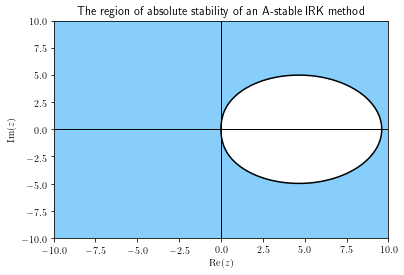

In [7]:
# Generate z values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
[X, Y] = np.meshgrid(x, y)
Z = X + Y * 1j

# Define stability function for the IRK method
R = (1 + 1/3 * Z + 1/16 * Z**2) / (1 - 2/3 * Z + 1/6 * Z**2)

# Plot the region of absolute stability
fig, ax = plt.subplots()

ax.contourf(X, Y, abs(R), levels=[0, 1], colors='lightskyblue')
ax.contour(X, Y, abs(R), levels=[1], colors='k')
ax.plot([-10, 10], [0, 0], 'k', linewidth=1)
ax.plot([0, 0], [-10, 10], 'k', linewidth=1)

ax.set_title('The region of absolute stability of an A-stable IRK method')
ax.set_xlabel('$\mathrm{Re}(z)$')
ax.set_ylabel('$\mathrm{Im}(z)$')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

plt.show()

---
## Stiffness
An important consideration when applying numerical methods to solve ODEs is whether the values that the step length can take for the method to be stable are large enough for the method to be applied without incurring prohibitive computational costs. For example, if a method requires a very small step length for it to be stabel, then the iterations required to step through the domain will be very large resulting in lots of computational operations and therefore time. Problems like is a known as stiff problems.

```{admonition} **Definition:** Stiffness
If a numerical method is forced to use, in a certain interval of integration, a step length which is excessively small in relation to the smoothness of the exact solution in that interval, then the problem is said to be stiff in that interval (Lambert, 1990). 
```

The stiffness of a problem depends on the system ODEs and the solver being applied to solve them and stiffness usually arises when there is a large variation in the behaviour of the individual ODEs in the system. Stiff systems require methods which are stable for larger values of the step length $h$ , e.g., implicit or A-stable methods.

### Stiffness ratio
Consider a system of linear ODEs of the form 

$$\mathbf{y}' = A \mathbf{y},$$

where $A$ is a coefficient matrix. We use the test ODE $y'=\lambda y$ to examine the stability of a numerical method so we need to transform our system into this form. Let $u_i$ be a transformation of $y_i$ and $u_i' = \lambda_iu_i$ where $\lambda$ is an [eigenvalue](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) of $A$ then 

$$\pmatrix{ u_1' \cr u_2' \cr \vdots \cr u_N'} = 
\pmatrix{\lambda_1 \cr & \lambda_2 \cr & & \ddots \cr & & & \lambda_N} 
\pmatrix{u_1 \cr u_2 \cr \vdots \cr u_N}$$

Let $V = (\mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_N)$ be a matrix containing the [eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) $\mathbf{v}_i$ corresponding to the eigenvalues $\lambda_i$ of $A$ then

$$AV = (A\mathbf{v}_1, A\mathbf{v}_2, \ldots, A\mathbf{v}_N),$$

and since $\lambda_i = A\mathbf{v}_i$

$$
\begin{aligned}
AV &= (\lambda_1 \mathbf{v}_1, \lambda_2 \mathbf{v}_2, \ldots, \lambda_N\mathbf{v}_N) = V\Lambda \\
V^{-1}AV &= \Lambda.
\end{aligned}
$$

So $\Lambda = V^{-1}AV$ is a linear transformation that diagonalises $A$ and the stability behaviour of $\mathbf{y}'=A\mathbf{y}$ can be analysed by considering $\mathbf{y}' = \Lambda \mathbf{y}$ . Since a stiff system will have a large variation in the step length and hence the values of $\lambda_i$ we can define a **stiffness ratio**

$$S = \frac{\max |\mathrm{Re}(\lambda_i)|}{\min |\mathrm{Re}(\lambda_i)|}.$$


#### Example 9

Determine the stiffness ratio of the following ODE

$$y'' - 1001 y' - 1000 y = 0.$$

Writing this as a system of first-order ODEs

$$
\begin{aligned}
    y_1' &= y_2',\\
    y_2' &= 1001y_2 - 1000 y_1,
\end{aligned}
$$

which can be written as the matrix equation

$$\pmatrix{y_1'\cr y_2'} = \pmatrix{0&1\cr -1000 & 1001}\pmatrix{y_1 \cr y_2}.$$

The eigenvalues of the coefficient matrix are $\lambda_1=1$ and $\lambda_2=1000$ so

$$S = \frac{1000}{1} = 1000$$

and this ODE can be considered stiff.

---
## Summary

- The [local truncation error](#local_truncation_error) is the error at each step of a method due to the truncation of the Taylor series in deriving the method.
- The [global truncation error](#global_truncation_error) is the accumulation of the local truncation errors.
- A method is considered [absolutely stable](#stability_definition) if the local truncation errors do not increase from one step to the next.
- The stability of a method is analysed by considering the simple test ODE $y'=\lambda y$.
- The [stability function](#Stability-functions), $R(z)$ where $z=h\lambda$, of a method is the amount by which the solution to the test ODE changes over a single step of length $h$.
- The [region of absolute stability](#Absolute-stability) is the set of all values of $z$ in the complex plane where the modulus of $R(z)$ is less than or equal to 1 (i.e., the local truncation errors do not increase over a single step).
- The stability function for an explicit Runge-Kutta method is given in equation [(4)](#erk_stability_function).
- The stability function for an order $k$ explicit Runge-Kutta method is the $k$th-order series expansion of $e^z$ given in equation [(5)](#e^z_expansion).
- The stability function for an implicit Runge-Kutta method is given in equation [(6)](#irk_stability_function).
- Implicit methods can be [A-stable](#A-stability) which means there is no limit placed on the value of the step length $h$ for a method to remain stable.
- A system of ODEs is considered [stiff](#Stiffness) if the ratio of the eigenvalues of the coefficient matrix is large. Stiff systems require methods that have larger regions of absolute stability.

---
## Exercises

1. Determine the stability function of the following Runge-Kutta method

    $$
    \begin{array}{c|ccccc}
0 \\
\frac{1}{4} & \frac{1}{4} \\
\frac{1}{2} & \frac{1}{2} & 0 \\
\frac{3}{4} & \frac{1}{2} & \frac{1}{4} \\
0 & 0 & \frac{1}{6} & -\frac{1}{3} & \frac{1}{6} \\ \hline
& -1 & \frac{2}{3} & -\frac{1}{3} & \frac{2}{3} & 1
\end{array}$$

2. Determine the stability function of the following Runge-Kutta method. Is this an A-stable method?
    
    $$
    \begin{array}{c|cc}
\frac{1}{4} & \frac{7}{24} & -\frac{1}{24} \\
\frac{3}{4} & \frac{13}{24} & \frac{5}{24} \\  \hline
& \frac{1}{2} & \frac{1}{2}
\end{array}$$


3. Plot the region of absolute stability for the following Runge-Kutta method.

    $$\begin{array}{c|cc}
\frac{1}{3} & \frac{1}{3} & 0 \\
1 & 1 & 0 \\ \hline
& \frac{3}{4} & \frac{1}{4}
\end{array}$$

4. Determine the stability function of the following Runge-Kutta method. What is the order of the method?

    $$\begin{array}{c|ccccc}
0 \\
\frac{2}{7} & \frac{2}{7} \\
\frac{4}{7} & -\frac{8}{35} & \frac{4}{5} \\
\frac{6}{7} & \frac{29}{42} & -\frac{2}{3} & \frac{5}{6} \\
1 & \frac{1}{6} & \frac{1}{6} & \frac{5}{12} & \frac{1}{4} \\ \hline
& \frac{11}{96} & \frac{7}{24} & \frac{35}{96} & \frac{7}{48} & \frac{1}{12}
\end{array}$$

5. Calculate the stiffness ratio for the following system of ODEs. What are the maximum step lengths that the Euler method is stable for solving each equation?

    $$
    \begin{aligned}
y_1' &= -80.6y_1 + 119.4y_2, \\ 
y_2'&= 79.6y_1 - 120.4y_2.
\end{aligned}
$$